# Gaussian Mixture Models (GMM)

Gaussian Mixture Models (GMMs) are probabilistic models that assume data points are composed by a mixture .of several
Gaussian distributions with unknown parameters. GMMs allow the decomposition of a complex dataset into a set of
simpler, underlying Gaussian components. 

This pyCO2stats module permits the synthetic sampling, computation of the PDF (probability density function) and the fit of GMMs.

## Generation of a set of synthetic populations

Script to create a set of synthetic samples with **pyco2stats.GMM**.

In [22]:
import pyco2stats as PyCO2
import numpy as np

# Case #1: synthetic sample, 2 components, n_samples = 100
my_means_2c = np.array([0.7, 2])
my_stds_2c = np.array([0.6, 0.4])
my_weights_2c = np.array([0.4, 0.6])
my_sample_1 = PyCO2.GMM.sample_from_gmm(n_samples=100, means=my_means_2c, 
                                        stds=my_stds_2c, weights=my_weights_2c, random_state=42)

# Case #2: the same of Case #1, but with n_samples = 1000
my_sample_2 = PyCO2.GMM.sample_from_gmm(n_samples=1000, means=my_means_2c, 
                                        stds=my_stds_2c, weights=my_weights_2c, random_state=42)

# Case #3: synthetic sample 3 components, n_samples = 1000
my_means_3c = np.array([0.7, 2, 2.5])
my_stds_3c = np.array([0.6, 0.4, 0.2])
my_weights_3c_a = np.array([0.2, 0.4, 0.4])
my_sample_3 = PyCO2.GMM.sample_from_gmm(n_samples=1000, means=my_means_3c, 
                                        stds=my_stds_3c, weights=my_weights_3c_a, random_state=42)

# Case #4: the same of Case #3, but with different weigths
my_weights_3c_b = np.array([0.1, 0.7, 0.2])
my_sample_4 = PyCO2.GMM.sample_from_gmm(n_samples=1000, means=my_means_3c, 
                                        stds=my_stds_3c, weights=my_weights_3c_b, random_state=42)


## Visualizing the populations
Plot the resulting synthetic samples with the **pyco2stats.Visualize_Mpl** module.

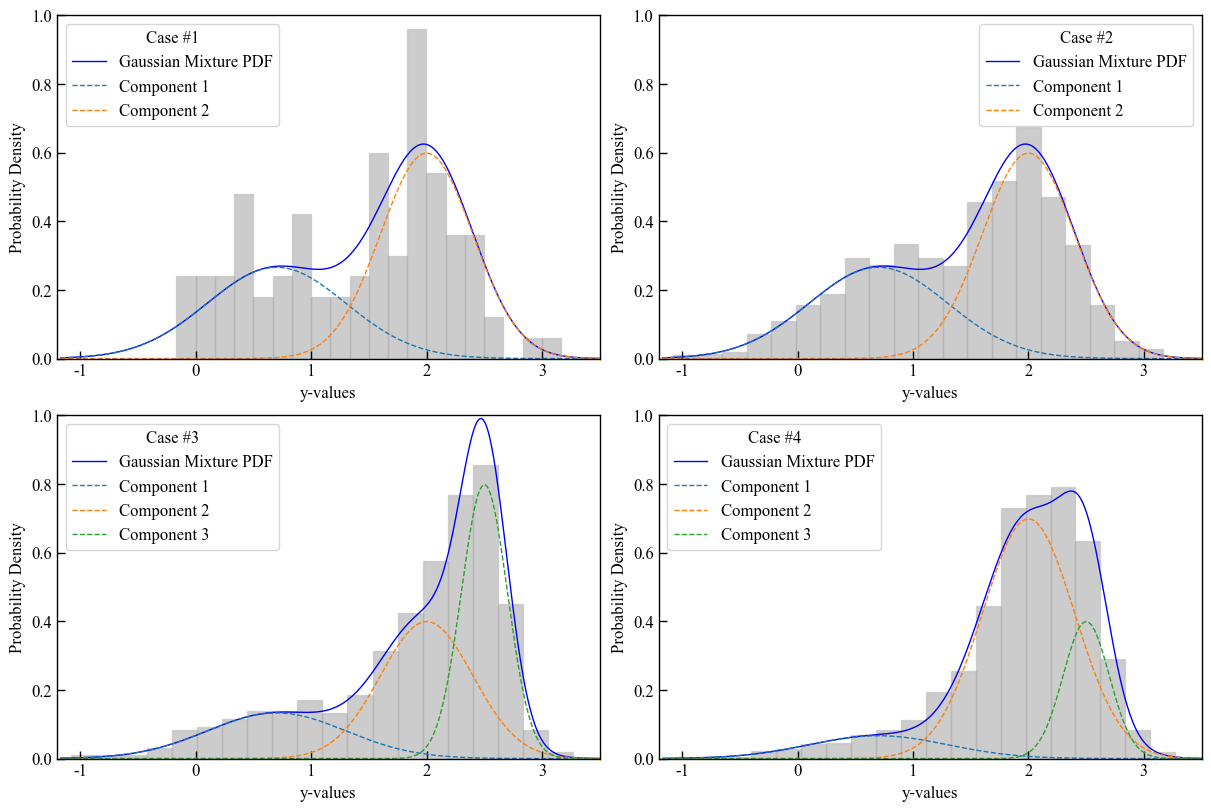

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))  
plt.rcParams['font.family'] = ['Times New Roman'] 
plt.rcParams['font.size'] = 12

pdf_plot_kwargs = {'color': 'blue', 'linewidth': 1}
component_plot_kwargs = {'linestyle': '--', 'linewidth': 1}
hist_plot_kwargs = {'alpha': 0.4, 'color': 'gray', 'edgecolor': 'darkgrey'}

x_values = np.linspace(min(my_sample_1) - 1, max(my_sample_1) + 1, 1000).reshape(-1, 1)

ax1 = fig.add_subplot(2,2,1)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax1, x_values, my_means_2c, my_stds_2c, my_weights_2c, data=my_sample_1,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax1.legend(title='Case #1')
ax1.set_xlabel('y-values')
ax1.set_ylabel('Probability Density')
ax1.set_ylim(0,1)
ax1.set_xlim(-1.2,3.5)

ax2 = fig.add_subplot(2,2,2)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax2, x_values,my_means_2c, my_stds_2c, my_weights_2c, data=my_sample_2,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax2.legend(title='Case #2')
ax2.set_xlabel('y-values')
ax2.set_ylabel('Probability Density')
ax2.set_ylim(0,1)
ax2.set_xlim(-1.2,3.5)

ax3 = fig.add_subplot(2,2,3)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax3, x_values, my_means_3c, my_stds_3c, my_weights_3c_a, data=my_sample_3,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax3.legend(title='Case #3')
ax3.set_xlabel('y-values')
ax3.set_ylabel('Probability Density')
ax3.set_ylim(0,1)
ax3.set_xlim(-1.2,3.5)

ax4 = fig.add_subplot(2,2,4)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax4, x_values, my_means_3c, my_stds_3c, my_weights_3c_b, data=my_sample_4,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax4.legend(title='Case #4')
ax4.set_xlabel('y-values')
ax4.set_ylabel('Probability Density')
ax4.set_ylim(0,1)
ax4.set_xlim(-1.2,3.5)

plt.savefig("GMM_sampling.png", dpi=300)


## GMMs fitting

The fit methods available in the GMM module are the following:
 * **GMM.gaussian_mixture_em** : fits the GMM to the sample by using the Expectation-Maximization (EM) algorithm described in [Elío et al., 2016](https://doi.org/10.1016/j.ijggc.2016.02.012);
 *  **GMM.gaussian_mixture_sklearn** : fits the GMM to the sample by using the EM algorithm implemented in [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html);
 *   **GMM.constrained_gaussian_mixture** : fits the GMM using PyTorch with specified constraints on means and standard deviations.

We will use the second synthetic sample (Case \#2) generated in the previous steps, to give an example of the fit methods.

In [24]:
import pyco2stats as PyCO2
import numpy as np
import matplotlib.pyplot as plt

# my synthetic sample
my_sample = my_sample_2

# number of components
n_comp = 2

# Fit GMM using EM algorithm
EM_mu, EM_std, EM_w, EM_ll = PyCO2.GMM.gaussian_mixture_em(my_sample, n_comp)

# Fit GMM using EM algorithm implemented using scikit-learn (skEM))
skEM_mu, skEM_std, skEM_w, skEM_ll = PyCO2.GMM.gaussian_mixture_sklearn(my_sample, n_comp)

# Fit GMM using the constrained Gradient Descent (cGD) algorithm
mean_bounds = [(-0.5, 1.5), (1, 3)]
std_bounds = [(0.1, 2.5), (0.1, 2.5)]

cGD_mu, cGD_std, cGD_w = PyCO2.GMM.constrained_gaussian_mixture(my_sample, mean_bounds, 
                                                                 std_bounds, n_comp, verbose=False)
    

## Visualizing the fitting

Plot the resulting GMM fits with the **pyco2stats.Visualize_Mpl** module.

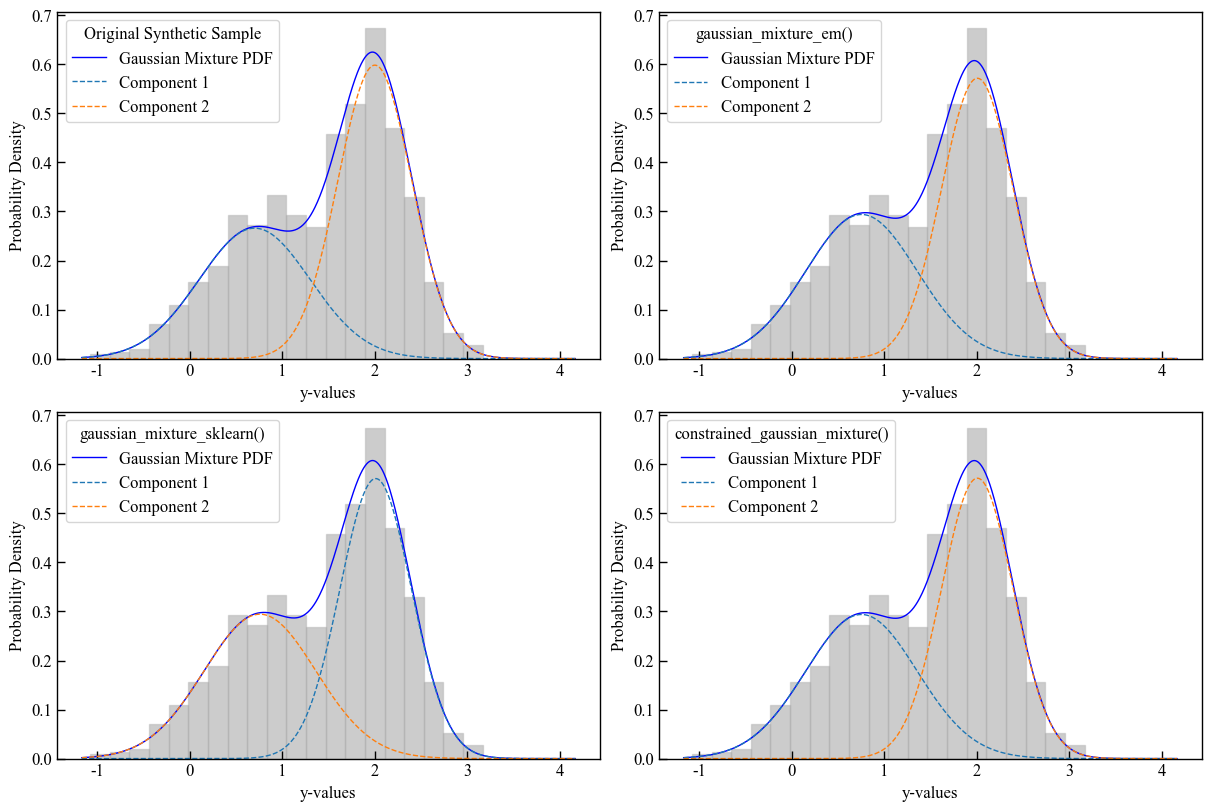

In [25]:
fig = plt.figure(figsize=(12, 8))  # Increase figure size
plt.rcParams['font.family'] = ['Times New Roman'] 
plt.rcParams['font.size'] = 12

ax1 = fig.add_subplot(2,2,1)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax1, x_values, my_means, my_stds, my_weights, data=my_sample,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax1.legend(title='Original Synthetic Sample')
ax1.set_xlabel('y-values')
ax1.set_ylabel('Probability Density')

ax2 = fig.add_subplot(2,2,2)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax2, x_values,EM_mu, EM_std, EM_w, data=my_sample,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax2.legend(title='gaussian_mixture_em()')
ax2.set_xlabel('y-values')
ax2.set_ylabel('Probability Density')

ax3 = fig.add_subplot(2,2,3)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax3, x_values, skEM_mu, skEM_std, skEM_w, data=my_sample,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax3.legend(title='gaussian_mixture_sklearn()')
ax3.set_xlabel('y-values')
ax3.set_ylabel('Probability Density')

ax4 = fig.add_subplot(2,2,4)
PyCO2.Visualize_Mpl.plot_gmm_pdf(ax4, x_values, cGD_mu, cGD_std, cGD_w, data=my_sample,
             pdf_plot_kwargs=pdf_plot_kwargs,
             component_plot_kwargs=component_plot_kwargs,
             hist_plot_kwargs=hist_plot_kwargs)
ax4.legend(title='constrained_gaussian_mixture()')
ax4.set_xlabel('y-values')
ax4.set_ylabel('Probability Density')
plt.savefig("GMM.png", dpi=300)


## Sinclair-like visualization
 The Sinclair method [Sinclair, 1974] is a reliable graphical procedure for partitioning datasets of polymodal values into two or more log-normal sub-populations. The method is based on the evidence that, on a probability plot, a dataset composed of multiple (n) superimposed log-normal populations plots as a series of joined straight-line segments with different slopes. Changes in the slope of the curve, called inflection points, are typically n-1 and they indicate the relative proportions of the different populations.
Sinclair-like visualization of the fitted GMM obtained from the **pyco2stats.GMM.gaussian_mixture_sklearn** by means of the **pyco2stats.Visualize_Mpl** module.

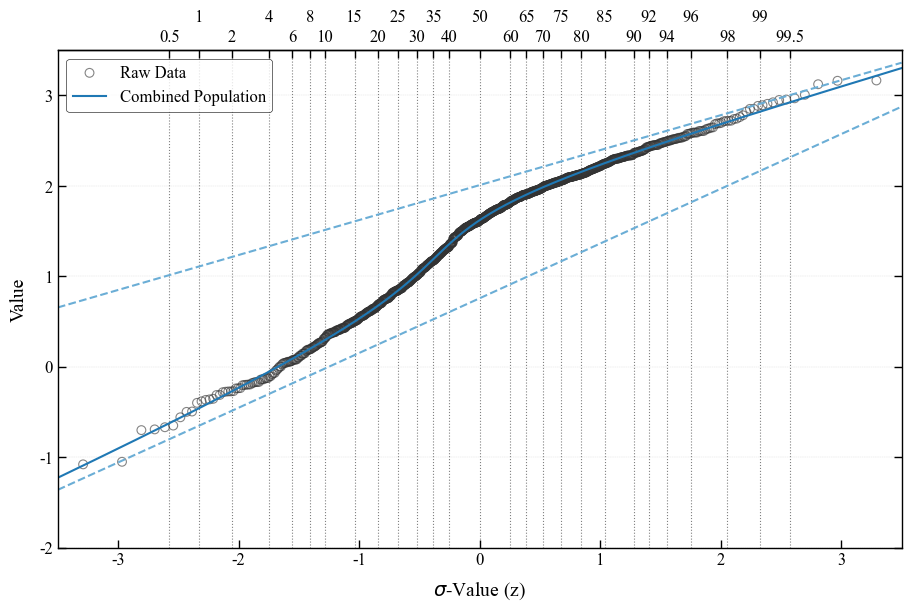

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pyco2stats as PyCO2

# 1) Enable constrained_layout and set up font‐fallback for missing glyphs
plt.rcParams['font.family']        = ['Times New Roman', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False   # use ASCII minus

# 2) Global style tweaks
plt.rcParams.update({
    'font.size':        12,
    'axes.linewidth':   1.0,
    'axes.edgecolor':   'black',
    'xtick.direction':  'in',
    'ytick.direction':  'in',
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'grid.color':       'gray',
    'grid.linestyle':   '--',
    'grid.linewidth':   0.3,
    'grid.alpha':       0.3,
})

# ── 3) Draw the figure ─────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(9, 6), constrained_layout=True)

# 3a) Raw data as open circles
PyCO2.Visualize_Mpl.pp_raw_data(
    my_sample,
    ax=ax,
    marker='o',
    s=40,
    c='none',
    edgecolor='#333333',
    linewidth=0.8,
    alpha=0.6,
    label='Raw Data'
)

# 3b) Combined mixture curve
PyCO2.Visualize_Mpl.pp_combined_population(
    skEM_mu, skEM_std, skEM_w,
    ax=ax,
    linestyle='-',
    linewidth=1.5,
    color='#1f78b4',
    label='Combined Population'
)

# 3c) Individual component curves
PyCO2.Visualize_Mpl.pp_single_populations(
    skEM_mu, skEM_std,
    ax=ax,
    linestyle='--',
    linewidth=1.5,
    color='#6baed6'
)

# 3d) Percentiles
PyCO2.Visualize_Mpl.pp_add_percentiles(
    ax=ax,
    percentiles='full',
    linestyle=':',
    linewidth=0.8,
    color='gray',
    label_size=12,
    zorder=0
)

# ── 4) Axes limits, labels, grid & spines ──────────────────────────
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-2.0, 3.5)
ax.set_xlabel(r'$\sigma$-Value (z)', fontsize=14, labelpad=8)
ax.set_ylabel('Value',            fontsize=14, labelpad=8)

ax.grid(axis='y')


# draw ticks on both sides
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis='y', which='both', labelright=False, right=True, left=True)

# ── 5) Legend ─────────────────────────────────────────────────────
leg = ax.legend(
    loc='upper left',
    frameon=True,
    framealpha=0.8,
    edgecolor='black',
    fontsize=12
)
leg.get_frame().set_linewidth(0.5)

# ── 6) Save & show ─────────────────────────────────────────────────
plt.savefig("Visualize_Sinclair_Mpl.png", dpi=300, bbox_inches='tight')
plt.show()


## Q-Q plot visualization

Resampling from the sklearn fit obtained by **pyco2stats.GMM.gaussian_mixture_sklearn** and q-q plot visualization by means of the **pyco2stats.Visualize_Mpl** module.

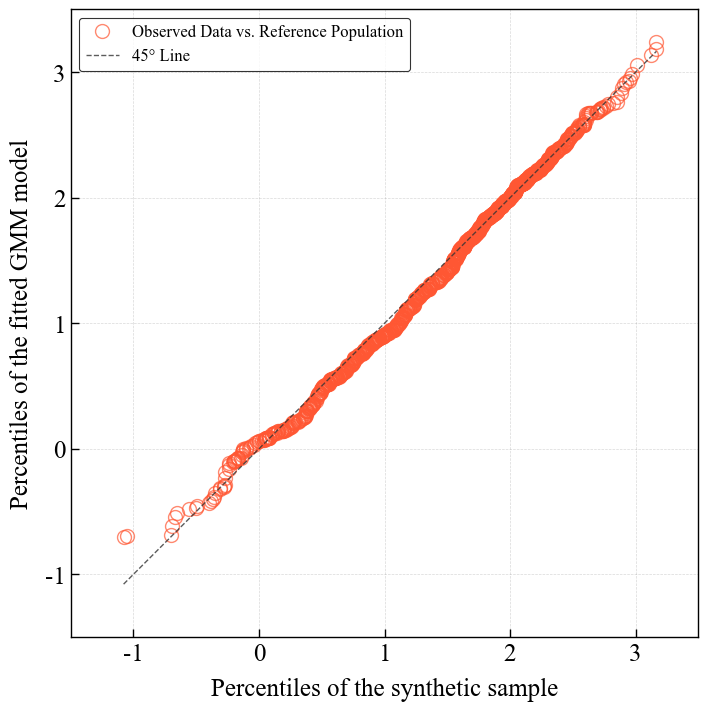

In [27]:
# ── 1) Resampling from the GMM made with scikit-learn ─────────────────────────────────────
skEM_sample = PyCO2.GMM.sample_from_gmm(n_samples=500, means=skEM_mu, stds=skEM_std, weights=skEM_w, random_state=42)

# ── 2) Imports & data as before ─────────────────────────────────────
import numpy as np
import matplotlib.pyplot as plt
import pyco2stats as PyCO2

# ── 3) Global style (same as above) ─────────────────────────────────
plt.rcParams.update({
    'figure.constrained_layout.use': True,
    'font.family':             ['Times New Roman', 'DejaVu Sans'],
    'font.size':               18,
    'axes.linewidth':          1.0,
    'axes.edgecolor':          'black',
    'xtick.direction':         'in',
    'ytick.direction':         'in',
    'xtick.major.size':        6,
    'ytick.major.size':        6,
    'xtick.major.width':       1.0,
    'ytick.major.width':       1.0,
    'grid.color':              'gray',
    'grid.linestyle':          '--',
    'grid.linewidth':          0.5,
    'grid.alpha':              0.3,
})

# ── 4) Create figure & axes ────────────────────────────────────────
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)

# ── 5) Draw Q–Q via new signature: raw_data, model_data, ax, then 
#      marker_kwargs=... and line_kwargs=... ─────────────────────────
PyCO2.Visualize_Mpl.qq_plot(
    my_sample, 
    skEM_sample, 
    ax,
    line_kwargs={
        'linestyle':'--',
        'color':'#333333',
        'linewidth':1.0,
        'alpha':0.8
    },
    marker_kwargs={
        'marker':           'o',
        'markersize':       10,
        'markeredgecolor':  '#FF5733',
        'markerfacecolor':  'none',
        'alpha':            0.7,
    }
)

# ── 6) Axes limits, aspect, labels ─────────────────────────────────
ax.set_xlim(-1.5, 3.5)
ax.set_ylim(-1.5, 3.5)
ax.set_aspect('equal', adjustable='box')

ax.set_xlabel('Percentiles of the synthetic sample', fontsize=18, labelpad=8)
ax.set_ylabel('Percentiles of the fitted GMM model', fontsize=18, labelpad=8)

# ── 7) Grid ───────────────────────────────────────────────
ax.grid(True)

# ── 8) Legend ─────────────────────────────────────────────────────
leg = ax.legend(loc='upper left',
                frameon=True, framealpha=0.8,
                edgecolor='black', fontsize=12)
leg.get_frame().set_linewidth(0.8)

# ── 9) Save & show ─────────────────────────────────────────────────
plt.savefig("qq_plot_Visualize_Mpl.png", dpi=300, bbox_inches='tight')
plt.show()
